In [3]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
print(df.columns)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [10]:
# Check for missing values
df.isnull().sum()

# Remove duplicates
df.drop_duplicates(inplace=True)

In [9]:
# Descriptive statistics
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [31]:
# Show info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 115.9+ KB


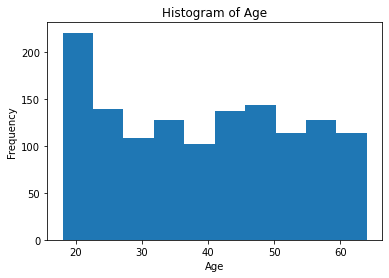

In [11]:
# Data visualization
# Histogram of age column:
plt.hist(df['age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()


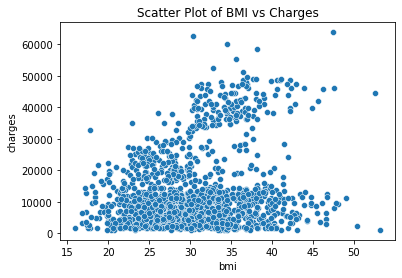

In [12]:
# Scatter plot of bmi vs charges
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('Scatter Plot of BMI vs Charges')
plt.show()

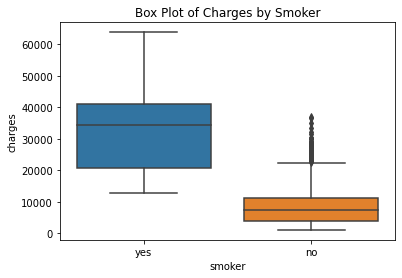

In [13]:
# Box plot of charges by smoker:
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Box Plot of Charges by Smoker')
plt.show()

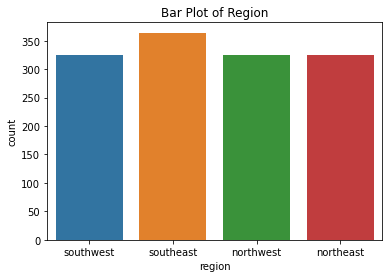

In [14]:
# Box plot of charges by smoker:
sns.countplot(x='region', data=df)
plt.title('Bar Plot of Region')
plt.show()

<AxesSubplot:>

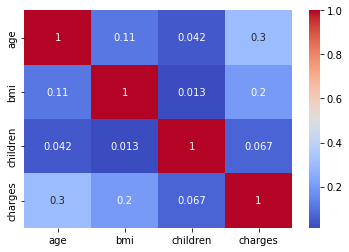

In [15]:
# Correlation matrix
df.corr()

# Heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

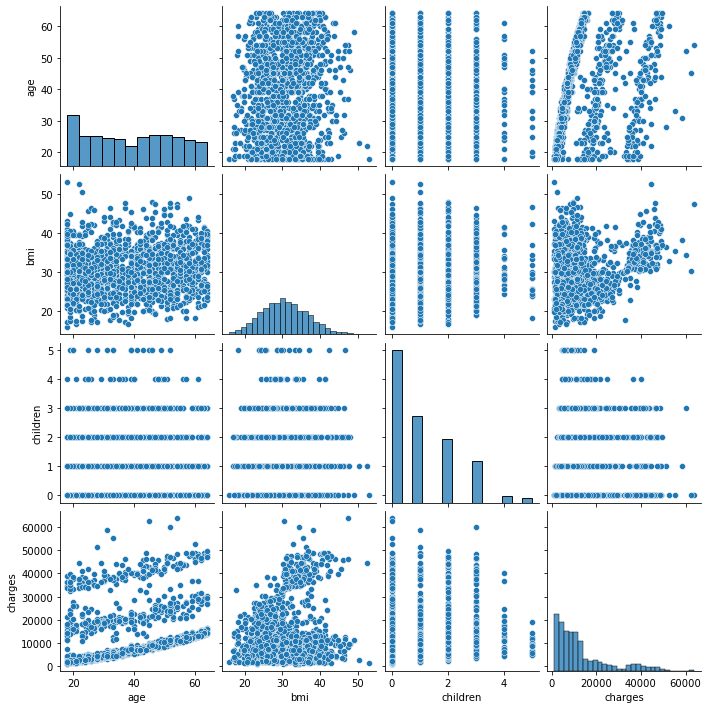

In [33]:
sns.pairplot(df)


In [35]:
# Using the bank churn data, carry out EDA and Logistic regression to predict whether a customer will churn.
# step 1: Load and preprocess the data
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# step 2:Encode categorical variables
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

In [36]:
#step 3: Scale numerical variables
num_cols = ['age', 'bmi', 'children', 'charges']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

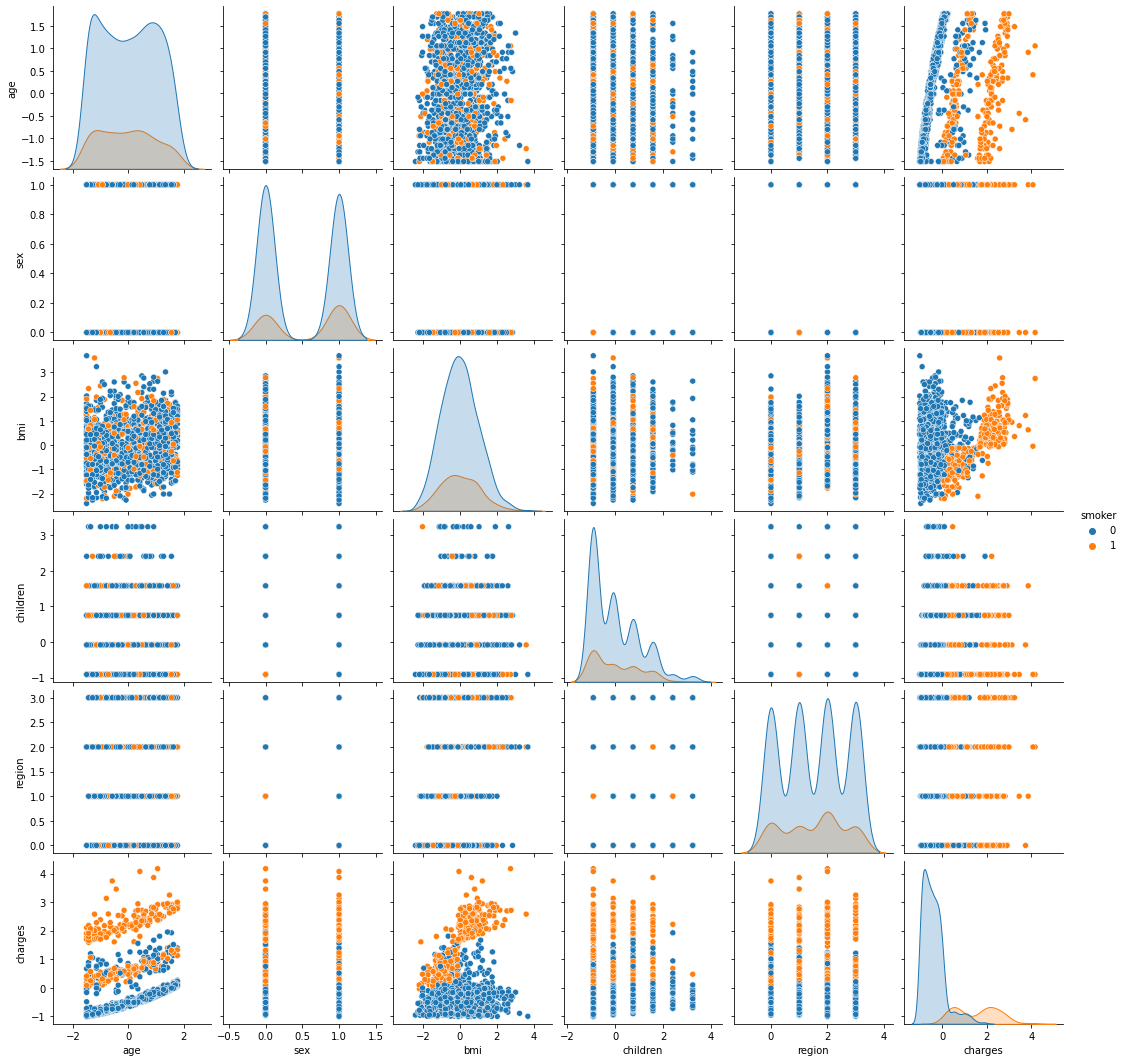

In [37]:
#step 4: Explore the data
sns.pairplot(df, hue='smoker')

In [38]:
# step 5: Split the data into training and testing sets
X = df.drop('smoker', axis=1)
y = df['smoker']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
# step 6: Train a logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [40]:
# step 7: Evaluate the model
# we evaluate the performance of the model on the testing data using the accuracy_score and classification_report functions from scikit-learn's metrics module.
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9701492537313433
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       208
           1       0.92      0.95      0.93        60

    accuracy                           0.97       268
   macro avg       0.95      0.96      0.96       268
weighted avg       0.97      0.97      0.97       268

